In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Accuracy on rbot

In [2]:
# Read the CSV file
df = pd.read_csv('../../scripts/gradients_vs_iterations.csv')

In [3]:
df['method'] = df['method'].replace({'jvp_diff' : 'jvp (forward)', 'vjp_diff' : 'vjp (backward)', 'numerical_diff' : 'numerical diff'})

In [4]:
((pivot['numerical diff'] - pivot['jvp (forward)']) / pivot['numerical diff']).abs()

NameError: name 'pivot' is not defined

In [5]:
from datetime import datetime

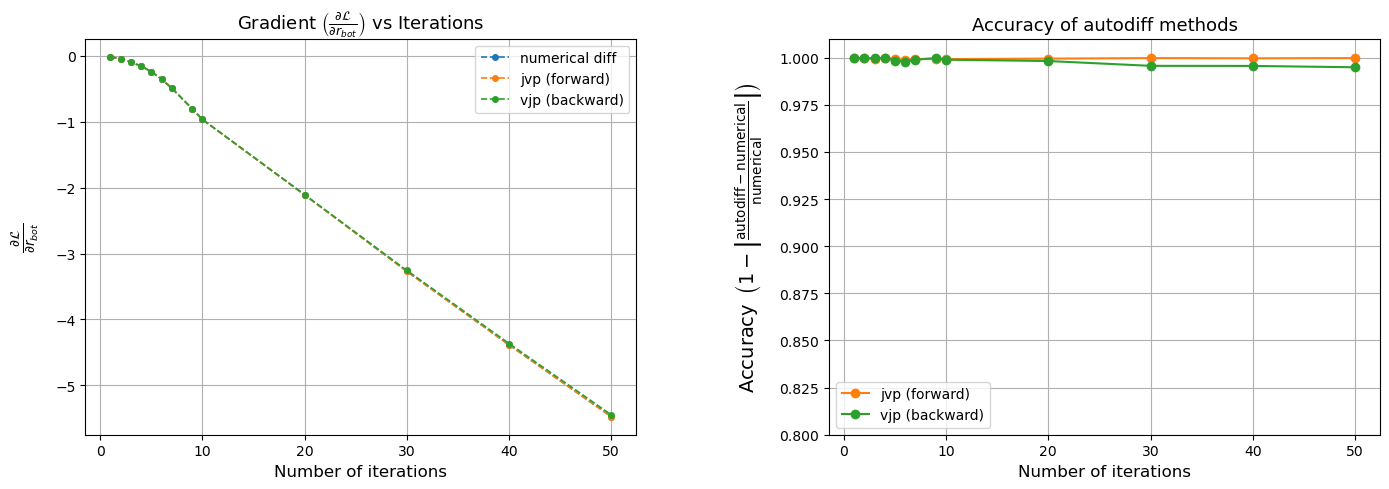

In [6]:
# Define consistent colors
color_map = {
    'jvp (forward)': 'C1',
    'vjp (backward)': 'C2',
    'numerical diff': 'C0',
}

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- First subplot: gradient vs iterations ---
ax = axes[0]
for method in df['method'].unique():
    method_df = df[df['method'] == method]
    ax.plot(
        method_df['iteration'],
        method_df['gradient'],
        marker='o',
        markersize=4,
        linestyle='--',
        linewidth=1.2,
        label=method,
        color=color_map.get(method, None)
    )

ax.set_xlabel('Number of iterations', fontsize=12)
ax.set_ylabel(r'$\frac{\partial \mathcal{L}}{\partial r_{bot}}$', fontsize=14, labelpad=10)
ax.set_title(r'Gradient $\left(\frac{\partial \mathcal{L}}{\partial r_{bot}}\right)$ vs Iterations', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True)

# --- Second subplot: relative difference ---
pivot = df.pivot(index='iteration', columns='method', values='gradient')
ax2 = axes[1]

abs_diff_jvp = 1 - ((pivot['numerical diff'] - pivot['jvp (forward)']) / pivot['numerical diff']).abs()
ax2.plot(
    pivot.index,
    abs_diff_jvp,
    marker='o',
    label='jvp (forward)',
    color=color_map['jvp (forward)']
)

abs_diff_vjp = 1 - ((pivot['numerical diff'] - pivot['vjp (backward)']) / pivot['numerical diff']).abs()
ax2.plot(
    pivot.index,
    abs_diff_vjp,
    marker='o',
    label='vjp (backward)',
    color=color_map['vjp (backward)']
)

ax2.set_xlabel('Number of iterations', fontsize=12)
ax2.set_ylabel(r'Accuracy $\,\left(1 - \left|\frac{\text{autodiff} - \text{numerical}}{\text{numerical}}\right|\right)$', fontsize=14, labelpad=10)
ax2.set_title('Accuracy of autodiff methods', fontsize=13)
ax2.legend(fontsize=10)
ax2.grid(True)
ax2.set_ylim((0.8, 1.01))

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)  # increase spacing between the two plots

fig.savefig(f'scalar_derivative_accuracy_{datetime.now().strftime("%d%m%y")}.png')

In [15]:
# Define consistent colors
color_map = {
    'jvp (forward)': 'C1',
    'vjp (backward)': 'C2',
    'numerical diff': 'C0',
}


In [27]:
df['method'].unique()

array(['numerical diff', 'jvp (forward)', 'vjp (backward)'], dtype=object)

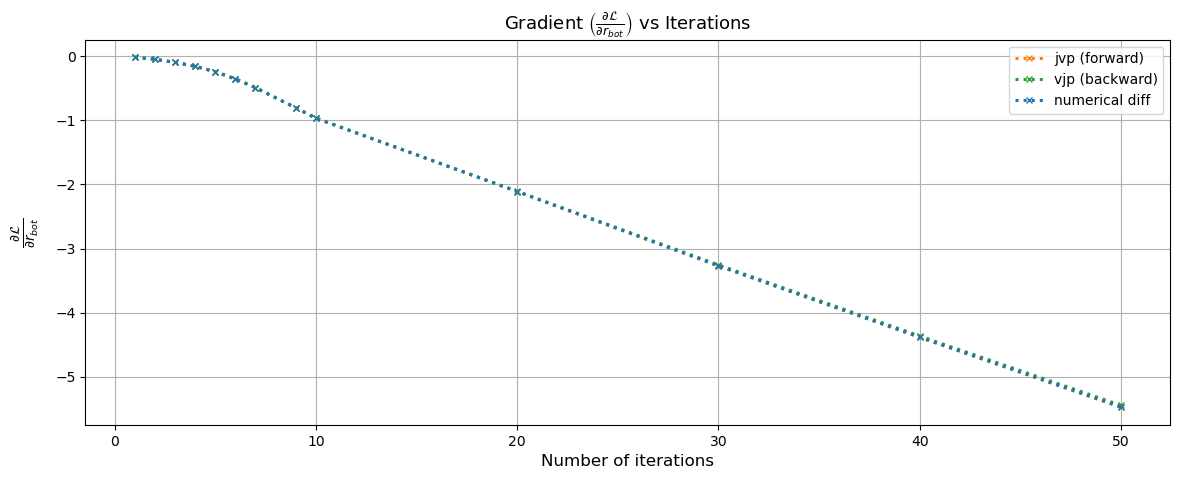

In [28]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 1, figsize=(14, 5))

# --- First subplot: gradient vs iterations ---
ax = axes
for method in ['jvp (forward)', 'vjp (backward)', 'numerical diff']:
    method_df = df[df['method'] == method]
    ax.plot(
        method_df['iteration'],
        method_df['gradient'],
        marker='x',
        markersize=4,
        linestyle=':',
        linewidth=2.2,
        label=method,
        color=color_map.get(method, None)
    )

ax.set_xlabel('Number of iterations', fontsize=12)
ax.set_ylabel(r'$\frac{\partial \mathcal{L}}{\partial r_{bot}}$', fontsize=14, labelpad=10)
ax.set_title(r'Gradient $\left(\frac{\partial \mathcal{L}}{\partial r_{bot}}\right)$ vs Iterations', fontsize=13)
ax.legend(fontsize=10)
ax.grid(True)

In [11]:
method

'vjp (backward)'